**Using Newton forward and  backward interpolation formulations  calculate the values of x=0.05 and x=0.37 for  given values of x=0.1, 0.2, 0.3, 0.4, 0.5 with f(x)=e^(2x). Correct  upto 6 significant digits through python code.  Also graphically plotted it.**

In [1]:
# import necessary modules
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# define necessary functions

def fact(n):
	f = 1
	for i in range(2, n + 1):
		f *= i
	return f
def u_for(u, n):
	temp = u
	for i in range(1, n):
		temp = temp * (u - i)
	return temp
def u_bac(u, n):
	temp = u
	for i in range(1, n):
		temp = temp * (u + i)
	return temp

In [3]:
# define newton interpolation
def newton_interpolation(x,y,value):
	n = len(x)	
	if value <= np.mean(x):
		# use lagrange forward interpolation
		y_for = np.zeros((n,n))
		for i in range(n):
			y_for[i][0] = y[i]
		for i in range(1, n):
			for j in range(n - i):
				y_for[j][i] = y_for[j + 1][i - 1] - y_for[j][i - 1]	
		sum = y_for[0][0];
		u = (value - x[0]) / (x[1] - x[0])
		for i in range(1,n):
			sum = sum + (u_for(u, i) * y_for[0][i]) / fact(i)
		return round(sum, 6)
	else:
		# use lagrange backword interpolation
		y_bac = np.zeros((n,n))
		for i in range(n):
			y_bac[i][0] = y[i]		
		for i in range(1,n):
			for j in range(n-1,i-2,-1):
				y_bac[j][i] = y_bac[j][i-1] - y_bac[j-1][i-1]
		sum = y_bac[n-1][0];
		u = (value - x[n-1]) / (x[1] - x[0])
		for i in range(1,n):
			sum = sum + (u_bac(u, i) * y_bac[n-1][i]) / fact(i)
		return round(sum, 6)

In [4]:
# set the data points
x = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
f = lambda x: np.exp(2*x)
y = f(x)

# set the value
value1 = 0.05
value2 = 0.37

In [5]:
# calculate newton interpolation of the value

if value1 <= np.mean(x):
	print("\nApplying Newton's forward interpolation-")	
else:
	print("\nApplying Newton's backward interpolation -")
print("Value at", value1, "is", newton_interpolation(x,y,value1))

if value2 <= np.mean(x):
	print("\nApplying Newton's forward interpolation-")	
else:
	print("\nApplying Newton's backward interpolation -")
print("Value at", value2, "is", newton_interpolation(x,y,value2))


Applying Newton's forward interpolation-
Value at 0.05 is 1.105304

Applying Newton's backward interpolation -
Value at 0.37 is 2.095929


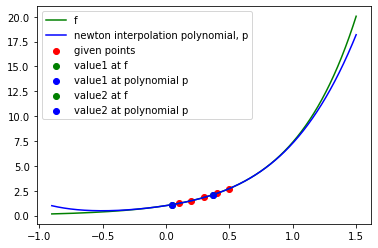

In [6]:
# visualization

x_list = np.arange(np.min(x)-1, np.max(x)+1, 0.001)
y_list = f(x_list)
z_list = []
for xi in x_list:
  z_list.append(newton_interpolation(x,y,xi))
plt.plot(x_list, y_list, color = 'green', label='f')
plt.plot(x_list, z_list, color = 'blue', label='newton interpolation polynomial, p')
plt.scatter(x, f(x), color = 'red', label ='given points')
plt.scatter(value1, f(value1), color = 'green', label ='value1 at f')
plt.scatter(value1, newton_interpolation(x,y,value1), color = 'blue', label ='value1 at polynomial p')
plt.scatter(value2, f(value2), color = 'green', label ='value2 at f')
plt.scatter(value2, newton_interpolation(x,y,value2), color = 'blue', label ='value2 at polynomial p')
plt.legend()
plt.show()